In [107]:
import pandas as pd
import numpy as np
from pathlib import Path

import matplotlib.pyplot as plt
from PIL import Image

from collections import namedtuple

### on check où se trouvent les données et ce qu'elles contiennnent

In [2]:
tutu = Path('data') / 'TrainingSetImagesDir'

In [5]:
my_paths = []
for _file in tutu.iterdir():
    my_paths.append(_file)

my_paths[:5]

[PosixPath('data/TrainingSetImagesDir/im_150_55.png'),
 PosixPath('data/TrainingSetImagesDir/im_234_6.png'),
 PosixPath('data/TrainingSetImagesDir/im_185_12.png'),
 PosixPath('data/TrainingSetImagesDir/im_471_32.png'),
 PosixPath('data/TrainingSetImagesDir/im_218_48.png')]

In [8]:
tutu = Path('data')

In [9]:
for file in tutu.iterdir():
    print(file)

data/TrainingSetImagesDir.zip
data/Mauna_Kea_Supp_Material.zip
data/TrainingSetImagesDir
data/TrainingSet_20aimVO.csv
data/additionnal_material
data/test_data_order.csv
data/TestSetImagesDir_fw4nYmL.zip
data/.ipynb_checkpoints


### Vérité terrain du jeu train

In [10]:
tutu = Path('data') / 'TrainingSet_20aimVO.csv'
df_y = pd.read_csv(tutu)

In [11]:
df_y.head()

,image_filename,class_number
0,im_4_0.png,0
1,im_21_0.png,0
2,im_9_0.png,0
3,im_8_0.png,0
4,im_15_0.png,0


In [12]:
my_f = lambda x:x.split('.')[0]
df_y.image_filename = df_y.image_filename.apply(my_f)
df_y.set_index('image_filename', inplace=True)
df_y.head()

,class_number
image_filename,
im_4_0,0
im_21_0,0
im_9_0,0
im_8_0,0
im_15_0,0


In [13]:
tutu = Path('data') / 'TrainingSetImagesDir'

In [14]:
image_names = [str(file.stem) for file in tutu.iterdir()]

In [15]:
image_names[:5]

['im_150_55', 'im_234_6', 'im_185_12', 'im_471_32', 'im_218_48']

In [16]:
df_y.loc[image_names[155]]

class_number    1
Name: im_116_32, dtype: int64

In [17]:
image_full_name = [file for file in tutu.iterdir()]

In [18]:
image_full_name[:5]

[PosixPath('data/TrainingSetImagesDir/im_150_55.png'),
 PosixPath('data/TrainingSetImagesDir/im_234_6.png'),
 PosixPath('data/TrainingSetImagesDir/im_185_12.png'),
 PosixPath('data/TrainingSetImagesDir/im_471_32.png'),
 PosixPath('data/TrainingSetImagesDir/im_218_48.png')]

### Il y a une redondance d'information débile dans les images noir & blanc encodées en 3 couches

In [137]:
image_3 = plt.imread(str(image_full_name[3]), format='png')

In [127]:
image_3.shape

(519, 521, 3)

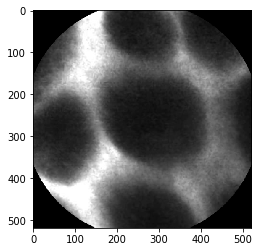

In [128]:
plt.imshow(image_3)

0


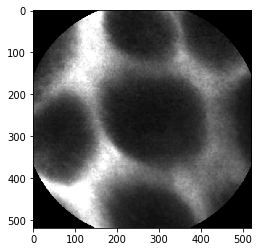

1


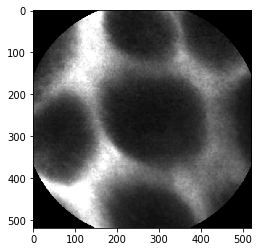

2


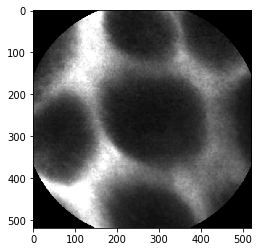

In [130]:
for couche_vba in range(3):
    print(couche_vba)
    fig, ax = plt.subplots()
    ax.imshow(image_3[:,:,couche_vba], cmap='gray')
    plt.show()

In [116]:
x_max, y_max, nb_layer = image_3.shape

In [122]:
# vérifier qu'on a 3 fois la même info

print(f'couche 0 == couche 1 ? : {np.all(image_3[:,:,0] == image_3[:,:,1])}')
print(f'couche 1 == couche 2 ? : {np.all(image_3[:,:,1] == image_3[:,:,2])}')

couche 0 == couche 1 ? : True
couche 1 == couche 2 ? : True


même problème avec PIL

On vérifie que toutes les images ont la même taille, 3 couches, et que les couhces sont redondantes

In [140]:
def redundant_layers(image):
    res_bool = []
    for layer in range(image.shape[2]):
        ma_boule = np.all(image[:,:,0] == image[:,:,layer])
        res_bool.append(ma_boule)
    
    return all(res_bool)

In [141]:
redundant_layers(image_3)

True

In [149]:
my_sizes = []
my_redundancy = []
my_vals = []

for image in image_full_name:
    image = plt.imread(str(image))
    my_sizes.append(image.shape)
    my_redundancy.append(redundant_layers(image))
    my_vals.append((np.min(image), np.max(image)))

In [150]:
set(my_sizes)

{(519, 521, 3)}

In [151]:
all(my_redundancy)

True

avec plt.imread on obtient un vieux truc entre 0 et 1

In [152]:
set(my_vals)

{(0.0, 0.1254902),
 (0.0, 0.23529412),
 (0.0, 0.26666668),
 (0.0, 0.31764707),
 (0.0, 0.40392157),
 (0.0, 0.45882353),
 (0.0, 0.4627451),
 (0.0, 0.48235294),
 (0.0, 0.54509807),
 (0.0, 0.5882353),
 (0.0, 0.5921569),
 (0.0, 0.59607846),
 (0.0, 0.60784316),
 (0.0, 0.6156863),
 (0.0, 0.6784314),
 (0.0, 0.69803923),
 (0.0, 0.7019608),
 (0.0, 0.7372549),
 (0.0, 0.7529412),
 (0.0, 0.77254903),
 (0.0, 0.7882353),
 (0.0, 0.7921569),
 (0.0, 0.79607844),
 (0.0, 0.8),
 (0.0, 0.80784315),
 (0.0, 0.8117647),
 (0.0, 0.81960785),
 (0.0, 0.83137256),
 (0.0, 0.8352941),
 (0.0, 0.84313726),
 (0.0, 0.84705883),
 (0.0, 0.85490197),
 (0.0, 0.85882354),
 (0.0, 0.8627451),
 (0.0, 0.87058824),
 (0.0, 0.8745098),
 (0.0, 0.8784314),
 (0.0, 0.88235295),
 (0.0, 0.8862745),
 (0.0, 0.89411765),
 (0.0, 0.8980392),
 (0.0, 0.90588236),
 (0.0, 0.9098039),
 (0.0, 0.9137255),
 (0.0, 0.91764706),
 (0.0, 0.92156863),
 (0.0, 0.9254902),
 (0.0, 0.92941177),
 (0.0, 0.93333334),
 (0.0, 0.9372549),
 (0.0, 0.9411765),
 (0.0, 0.9

In [148]:
np.max(image)

1.0

In [19]:
image_3 = Image.open(image_full_name[3])

In [20]:
image_3.__dict__

{'im': None,
 'mode': 'RGB',
 '_size': (521, 519),
 'palette': None,
 'info': {},
 'category': 0,
 'readonly': 1,
 'pyaccess': None,
 '_min_frame': 0,
 'tile': [('zip', (0, 0, 521, 519), 41, 'RGB')],
 'decoderconfig': (),
 'decodermaxblock': 65536,
 'fp': <_io.BufferedReader name='/home/francoischanel/repoGit/mauna_key/data/TrainingSetImagesDir/im_471_32.png'>,
 'filename': '/home/francoischanel/repoGit/mauna_key/data/TrainingSetImagesDir/im_471_32.png',
 '_exclusive_fp': True,
 'png': <PIL.PngImagePlugin.PngStream at 0x7f49a25b0198>,
 'text': {},
 '_PngImageFile__idat': 8192}

In [21]:
np.array(image_3).shape

(519, 521, 3)

In [23]:
type(image_3)

PIL.PngImagePlugin.PngImageFile

idem, elles ont absurdement 3 couches identiques mêmes dépiles par PIL

In [153]:
my_sizes = []
my_redundancy = []
my_vals = []

for image in image_full_name:
    image = Image.open(image)
    image = np.array(image)
    my_sizes.append(image.shape)
    my_redundancy.append(redundant_layers(image))
    my_vals.append((np.min(image), np.max(image)))

In [154]:
set(my_sizes)

{(519, 521, 3)}

In [155]:
all(my_redundancy)

True

In [157]:
set(my_vals)

{(0, 32),
 (0, 60),
 (0, 68),
 (0, 81),
 (0, 103),
 (0, 117),
 (0, 118),
 (0, 123),
 (0, 139),
 (0, 150),
 (0, 151),
 (0, 152),
 (0, 155),
 (0, 157),
 (0, 173),
 (0, 178),
 (0, 179),
 (0, 188),
 (0, 192),
 (0, 197),
 (0, 201),
 (0, 202),
 (0, 203),
 (0, 204),
 (0, 206),
 (0, 207),
 (0, 209),
 (0, 212),
 (0, 213),
 (0, 215),
 (0, 216),
 (0, 218),
 (0, 219),
 (0, 220),
 (0, 222),
 (0, 223),
 (0, 224),
 (0, 225),
 (0, 226),
 (0, 228),
 (0, 229),
 (0, 231),
 (0, 232),
 (0, 233),
 (0, 234),
 (0, 235),
 (0, 236),
 (0, 237),
 (0, 238),
 (0, 239),
 (0, 240),
 (0, 241),
 (0, 242),
 (0, 243),
 (0, 244),
 (0, 245),
 (0, 246),
 (0, 247),
 (0, 248),
 (0, 249),
 (0, 250),
 (0, 251),
 (0, 252),
 (0, 253),
 (0, 254),
 (0, 255)}

> en important avec PIL, on a bien un truc propre en 255 nuances de gris

In [ ]:
my_image = Image.open()

In [24]:
from PIL import Image, ImageSequence

In [29]:
layers = [frame.copy() for frame in ImageSequence.Iterator(image_3)]

In [37]:
len(layers)

1

In [36]:
image_3.getbands()

('R', 'G', 'B')

In [38]:
image_3.__dict__

{'im': <ImagingCore at 0x7f49a23d76f0>,
 'mode': 'RGB',
 '_size': (521, 519),
 'palette': None,
 'info': {},
 'category': 0,
 'readonly': 0,
 'pyaccess': None,
 '_min_frame': 0,
 'tile': [],
 'decoderconfig': (),
 'decodermaxblock': 65536,
 'fp': None,
 'filename': '/home/francoischanel/repoGit/mauna_key/data/TrainingSetImagesDir/im_471_32.png',
 '_exclusive_fp': True,
 'png': None,
 'text': {},
 '_PngImageFile__idat': 0,
 'map': None,
 'encoderinfo': {},
 'encoderconfig': (False, -1, -1, b'')}

In [41]:
image_3.getbands()

('R', 'G', 'B')

In [45]:
image_3.getcolors()[:5]

[(4638, (255, 255, 255)),
 (937, (253, 253, 253)),
 (440, (251, 251, 251)),
 (405, (249, 249, 249)),
 (323, (247, 247, 247))]

In [48]:
image_3.getdata(band=0)

In [49]:
np.array(image_3.getdata(band=0))

array([0, 0, 0, ..., 0, 0, 0])

In [50]:
image_3.tell()

0

In [51]:
image_3.split()

(<PIL.Image.Image image mode=L size=521x519 at 0x7F49A299BD30>,
 <PIL.Image.Image image mode=L size=521x519 at 0x7F49A299BC88>,
 <PIL.Image.Image image mode=L size=521x519 at 0x7F49A1FE34E0>)

In [52]:
first_band = image_3.split()[0]

In [53]:
type(image_3)

PIL.PngImagePlugin.PngImageFile

In [54]:
type(first_band)

PIL.Image.Image

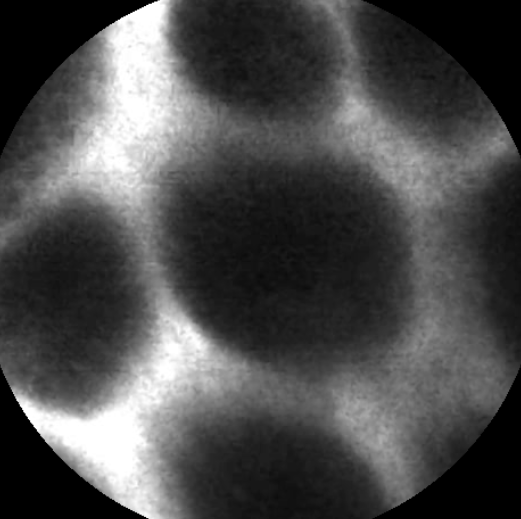

In [55]:
first_band

In [56]:
np.array(first_band)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [65]:
np.array(first_band).shape

(519, 521)

In [57]:
first_band.__dict__

{'im': <ImagingCore at 0x7f49a2331cd0>,
 'mode': 'L',
 '_size': (521, 519),
 'palette': None,
 'info': {},
 'category': 0,
 'readonly': 0,
 'pyaccess': None,
 'encoderinfo': {},
 'encoderconfig': (False, -1, -1, b'')}

In [58]:
np.array(first_band).max()

255

In [62]:
image_3.width

521

In [63]:
first_band.width

521

In [64]:
image_3.info

{}

TODO : 
- ouvrir toutes les images avec PIL.Image.open
- extraire le band 1 (vu qu'on sait qu'ils sont identiques)
- coller ça dans un nouveau dossier en conservant le nom de l'image
- extraire ensuite les np.array, reshape et tout fusionner en un seul X_train

In [67]:
_path = image_full_name[5]

In [72]:
_path.parts

('data', 'TrainingSetImagesDir', 'im_203_42.png')

In [73]:
_path.anchor

''

In [75]:
_path.parent.parent

PosixPath('data')

In [76]:
_path.parents

<PosixPath.parents>

In [77]:
_path.stem

'im_203_42'

In [93]:
_path.suffix

'.png'

In [94]:
_path.name

'im_203_42.png'

In [97]:
my_repo = Path('data') / 'X_train_y_train'

In [98]:
my_name = my_repo / 'tutu.png'

In [99]:
first_band.save(fp=my_name)

In [90]:
tutu = Image.open(my_name)

In [92]:
np.array(tutu).shape

(519, 521)

In [100]:
tutu = Image.open(my_name)

In [101]:
type(tutu)

PIL.PngImagePlugin.PngImageFile

In [102]:
type(first_band)

PIL.Image.Image

In [103]:
tutu.__dict__

{'im': None,
 'mode': 'L',
 '_size': (521, 519),
 'palette': None,
 'info': {},
 'category': 0,
 'readonly': 1,
 'pyaccess': None,
 '_min_frame': 0,
 'tile': [('zip', (0, 0, 521, 519), 41, 'L')],
 'decoderconfig': (),
 'decodermaxblock': 65536,
 'fp': <_io.BufferedReader name='/home/francoischanel/repoGit/mauna_key/data/X_train_y_train/tutu.png'>,
 'filename': '/home/francoischanel/repoGit/mauna_key/data/X_train_y_train/tutu.png',
 '_exclusive_fp': True,
 'png': <PIL.PngImagePlugin.PngStream at 0x7f49a16bf4a8>,
 'text': {},
 '_PngImageFile__idat': 65536}

In [104]:
first_band.__dict__m

{'im': <ImagingCore at 0x7f49a2331cd0>,
 'mode': 'L',
 '_size': (521, 519),
 'palette': None,
 'info': {},
 'category': 0,
 'readonly': 0,
 'pyaccess': None,
 'encoderinfo': {},
 'encoderconfig': (False, -1, -1, b'')}

In [ ]:
flatten_images = {}
my_root = Path('data') / 'X_train_y_train'


for image_path in image_full_name:
    image_3_couches = Image.open(image_path)
    name = image_path.name
    stem = image_path.stem
    first_layer = image_3_couches.split()[0]
    first_layer.save(my_root / name)
    _array = np.array(first_layer)
    ii, jj = _array.shape
    _array = _array.reshape(ii, jj, 1)
    flatten_images.update({stem:_array})    

In [129]:
aa = np.random.randint(0,5,15).reshape(3, 5)
bb = np.random.randint(0,5,15).reshape(3, 5)

In [130]:
aa.shape

(3, 5)

In [131]:
cc = np.array([aa, bb])

In [132]:
cc.shape

(2, 3, 5)

In [133]:
aa

array([[4, 3, 4, 3, 3],
       [2, 1, 1, 4, 2],
       [4, 1, 4, 4, 1]])

In [134]:
bb

array([[2, 1, 2, 2, 3],
       [2, 3, 4, 2, 0],
       [0, 0, 3, 4, 1]])

In [135]:
cc

array([[[4, 3, 4, 3, 3],
        [2, 1, 1, 4, 2],
        [4, 1, 4, 4, 1]],

       [[2, 1, 2, 2, 3],
        [2, 3, 4, 2, 0],
        [0, 0, 3, 4, 1]]])

In [136]:
cc = cc.reshape(2, 3, 5, 1)

In [137]:
cc.shape

(2, 3, 5, 1)

In [145]:
cc[0, :,:,0].shape

(3, 5)